# Measuring the Speed of Light

In the late 1800s, Simon Newcomb performed a series of measurements of the speed of light. In this notebook, you will take his raw data and perform some simple analysis and visualization of this data using Pandas.

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Raw data

Newcomb measured how long it took (in nanoseconds) for light to travel $7442$ meters. His raw measurements are reported as deviations from $24,800$ nanoseconds. Here is a file with the raw data. This comes from Stigler (1977).

In [10]:
offset = 24800 # add this to raw data to get times in nanoseconds
distance = 7442 # distance in meters traveled

In [11]:
%%writefile speed_of_light.txt
28 26 33 24 34 -44 27 16 40 -2
29 22 24 21 25 30 23 29 31 19
24 20 36 32 36 28 25 21 28 29
37 25 28 26 30 32 36 26 30 22
36 23 27 27 28 27 31 27 26 33
26 32 32 24 39 28 24 25 32 25
29 27 28 29 16 23

Overwriting speed_of_light.txt


## Reading the data

Read the raw data in as a Pandas `DataFrame`:

* Create a column named `raw` with integer valued deviations.
* Name the `DataFrame` `data`.

In [41]:
dat = []

with open("speed_of_light.txt") as file:
    for line in file:
        dat += list(map(int, line.split()))

data = pd.DataFrame(np.array(dat), columns=['raw'])

In [42]:
data.head()

,raw
0,28
1,26
2,33
3,24
4,34


In [43]:
assert list(data.columns)==['raw']
assert len(data)==66
assert data.raw.dtype==np.dtype(int)

## Transforming the data

Create two new columns in the `DataFrame`:

* A column named `time` that has the times in nanoseconds.
* A column named `speed` that has the speeds in meters/nanosecond.

In [44]:
data['time'] = data['raw'] + offset
data['speed'] = distance / data['time']

In [45]:
data.head()

,raw,time,speed
0,28,24828,0.299742
1,26,24826,0.299766
2,33,24833,0.299682
3,24,24824,0.299791
4,34,24834,0.299670


In [46]:
assert list(data.columns)==['raw', 'time', 'speed']
assert abs(data.time.mean()-24826.0)<1.0
assert abs(data.speed.mean()-0.3)<0.1
assert data.time.dtype==np.dtype(int)
assert data.speed.dtype==np.dtype(float)

## Visualization and outlier removal

Make an appropriately labeled (with units) `distplot` of the `time` data.

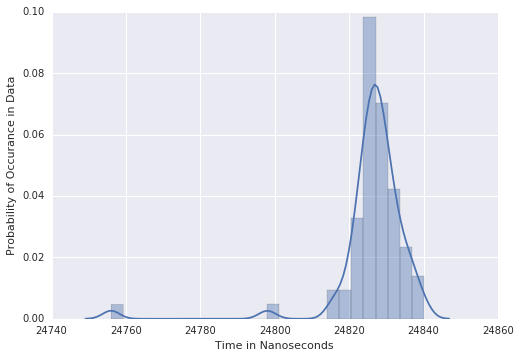

In [54]:
sns.distplot(data['time']);
sns.axlabel("Time in Nanoseconds", "Probability of Occurance in Data")

Make an appropriately labeled (with units) of the speed data:

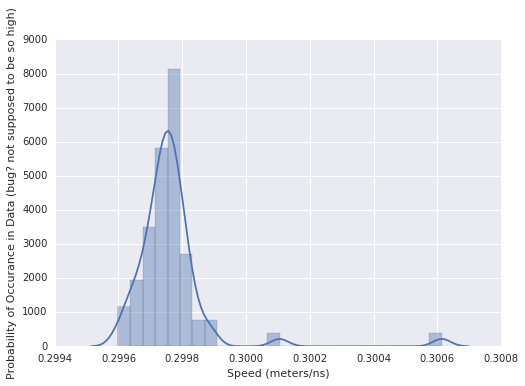

In [55]:
sns.distplot(data['speed']);
sns.axlabel("Speed (meters/ns)", "Probability of Occurance in Data (bug? not supposed to be so high)")

Create a new `DataFrame` named `data2` that has the outliers removed:

In [73]:
data2 = pd.DataFrame(data[data['speed'] < .3], columns=data.columns)

Make an appropriately labeled (with units) of the speed data with outliers removed:

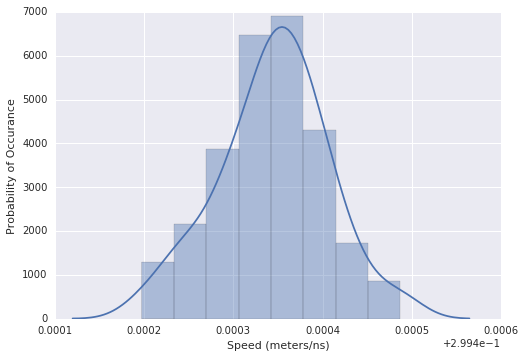

In [74]:
sns.distplot(data2['speed']);
sns.axlabel("Speed (meters/ns)", "Probability of Occurance")

## Bootstrapped mean

Here is the actual speed of light in meters/nanoseconds:

In [89]:
actual = 299792458.0*1e-9

Compute the (`n=400`) bootstrapped distribution of the mean speed of light as a NumPy array named `means`. Use the `sample` method of the Pandas `Series/DataFrame` object to do this.

In [96]:
means = np.array([data2['speed'].sample(400, replace=True).mean() for x in range(len(data2))])

Make an appropriately labeled `distplot` of the mean distribution that includes a vertical line where the actual speed of light is. Print the mean and 95% confidence interval of this distribution. Does this experiment agree with the actual speed of light?

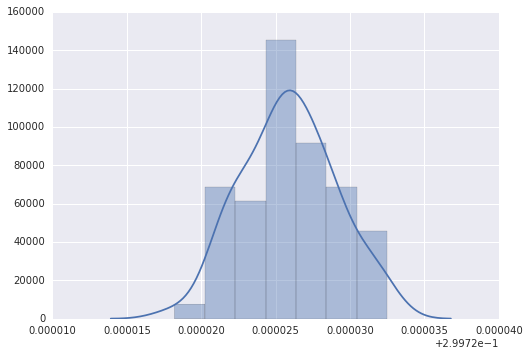

In [101]:
sns.distplot(means);

In [106]:
print("Mean: " + str(means.mean()))
print("Confidence Interval: [" + str(np.percentile(means, 5)) + ", " + str(np.percentile(means, 95)) + "]")

Mean: 0.299745896895
Confidence Interval: [0.299741532912, 0.299751392474]


The experiment was pretty close